Consider the UCI Wine Quality Dataset, which contains physiochemical properties of wines along with their quality scores (ranging from 0 to 10). Your task is to analyze the statistical properties (mean, variance, skewness and entropy) of the given features and use them to find out

* Wine Quality
* Which statistical measure is the most important predictor of wine quality?
* Does high entropy indicate harder classification of wine quality?
* What happens if we drop features with high variance

In [1]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
plt.style.use('ggplot')

In [2]:
# red_wine_quality = pd.read_csv('datasets/winequality-red.csv', sep=';')
# white_wine_quality = pd.read_csv('datasets/winequality-white.csv', sep=';')
# wine_quality = pd.concat([red_wine_quality, white_wine_quality], axis=0)

wine_quality = fetch_ucirepo(id=186)

In [3]:
wq_X = wine_quality.data.features
wq_y = wine_quality.data.targets
# wq_X = wine_quality.drop(columns=['quality'])
# wq_y = wine_quality['quality']

In [4]:
wq_X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


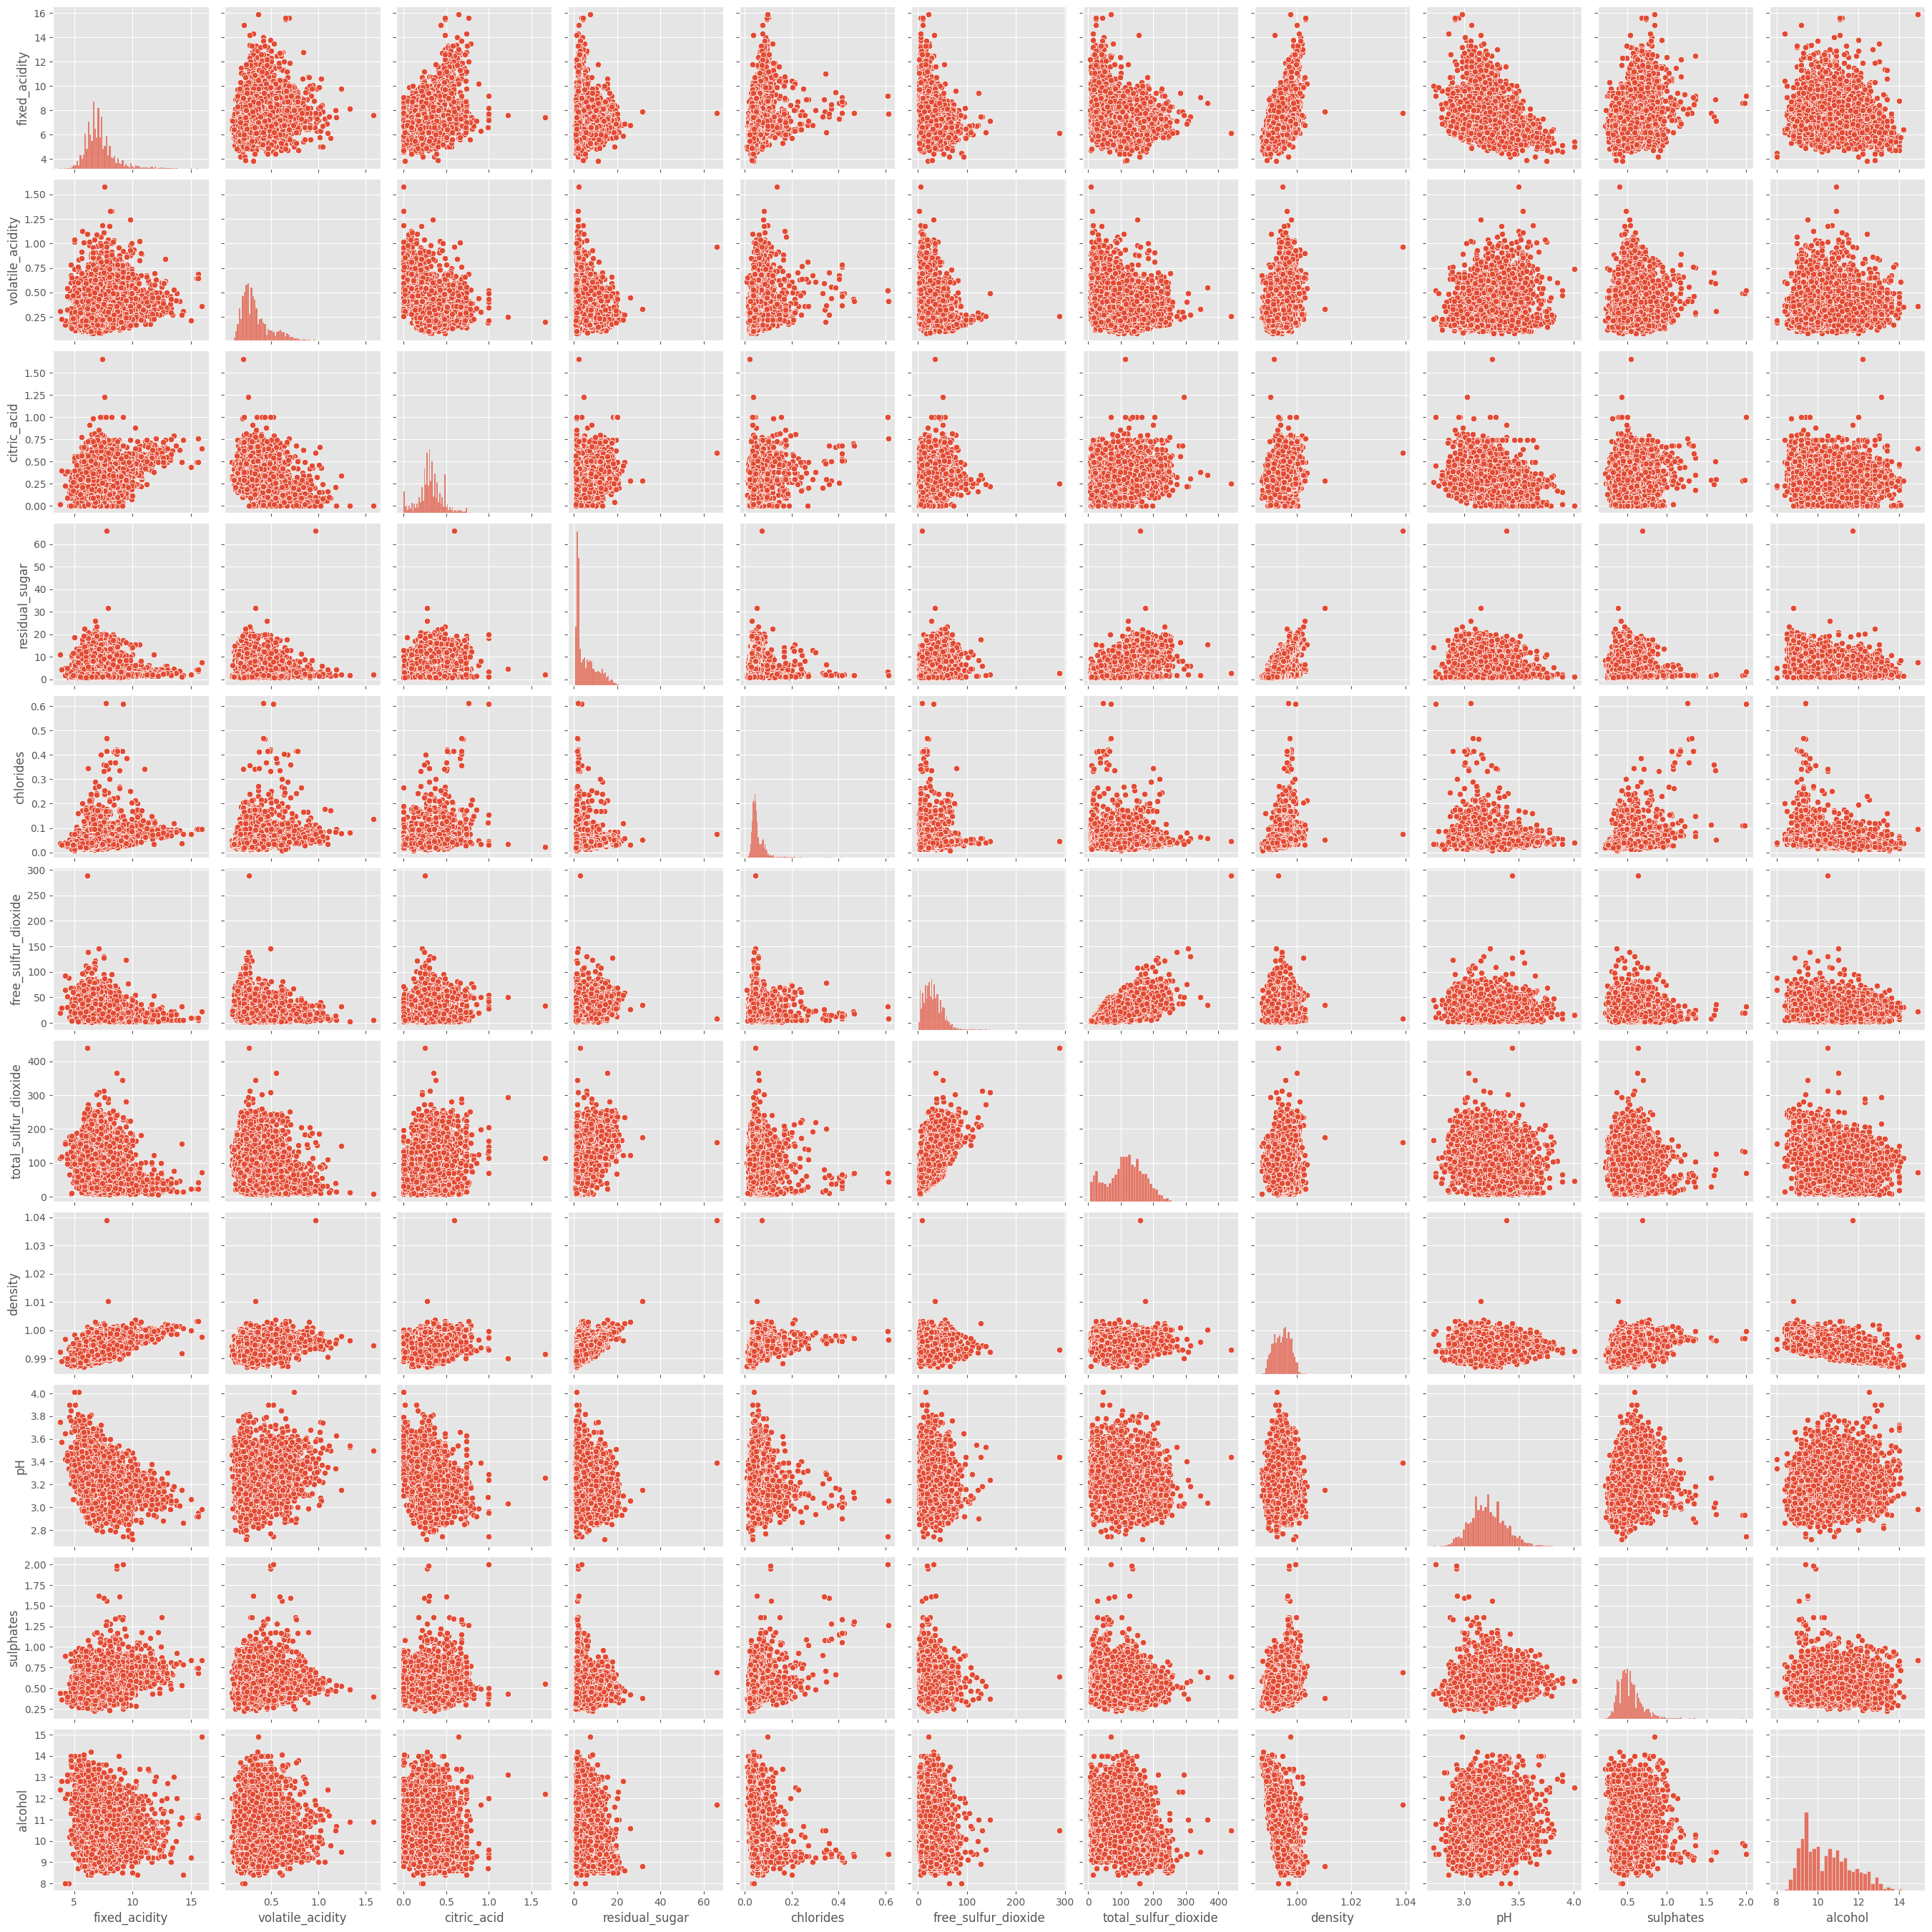

In [5]:
sns.pairplot(wq_X)

In [6]:
wq_X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [7]:
wq_y.isnull().sum()

quality    0
dtype: int64

In [8]:
wq_X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [9]:
wq_y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


Calculating the mean, variance, skewness and entropy of each feature of the wine quality dataset

In [10]:
stat_props = pd.DataFrame()
stat_props["Mean"] = wq_X.mean()
stat_props["Variance"] = wq_X.var()
stat_props["Skewness"] = wq_X.skew()

stat_props["Entropy"] = wq_X.apply(lambda x: entropy(x.value_counts()))

new_row = pd.DataFrame(
    {
        "Mean": wq_y.mean(),
        "Variance": wq_y.var(),
        "Skewness": wq_y.skew(),
        "Entropy": entropy(wq_y.value_counts())
    }
)

stat_props = pd.concat([stat_props, new_row])

stat_props

,Mean,Variance,Skewness,Entropy
fixed_acidity,7.215307,1.680740,1.723290,3.794054
volatile_acidity,0.339666,0.027105,1.495097,4.130225
citric_acid,0.318633,0.021117,0.471731,3.910075
residual_sugar,5.443235,22.636696,1.435404,4.798590
chlorides,0.056034,0.001227,5.399828,4.372805
free_sulfur_dioxide,30.525319,315.041192,1.220066,4.197942
total_sulfur_dioxide,115.744574,3194.720039,-0.001177,5.352233
density,0.994697,0.000009,0.503602,6.205715
pH,3.218501,0.025853,0.386839,4.165196
sulphates,0.531268,0.022143,1.797270,3.965272


From the calculations, we are able to find that the feature <b>total_sulfur_dioxide</b> has the highest variance

Creating another dataset from the wine quality dataset by dropping the column with the highest variance

In [11]:
wq_X_1 = wq_X.drop(columns = ["total_sulfur_dioxide"])

In [12]:
wq_y["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

Creating a third dataset with the <b>density</b> column removed. (This feature has the highest entropy among all the features)

In [13]:
wq_X_2 = wq_X.drop(columns = ["density"])

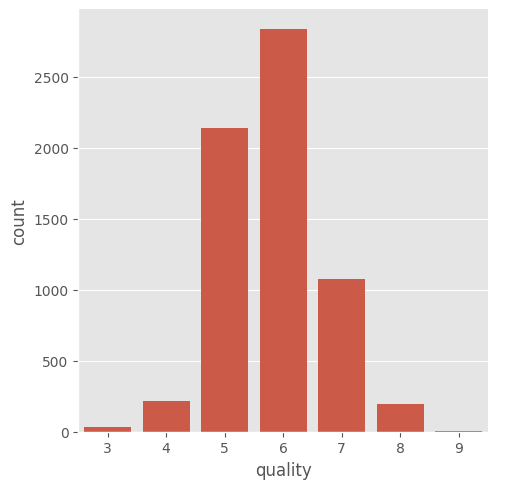

In [14]:
sns.catplot(x = "quality", data = wq_y, kind = "count")

In [15]:
combined = pd.concat([wq_X, wq_y], axis = 1)


Calculating the correlation matrix of the dataset and displaying a heatmap

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

<Axes: >

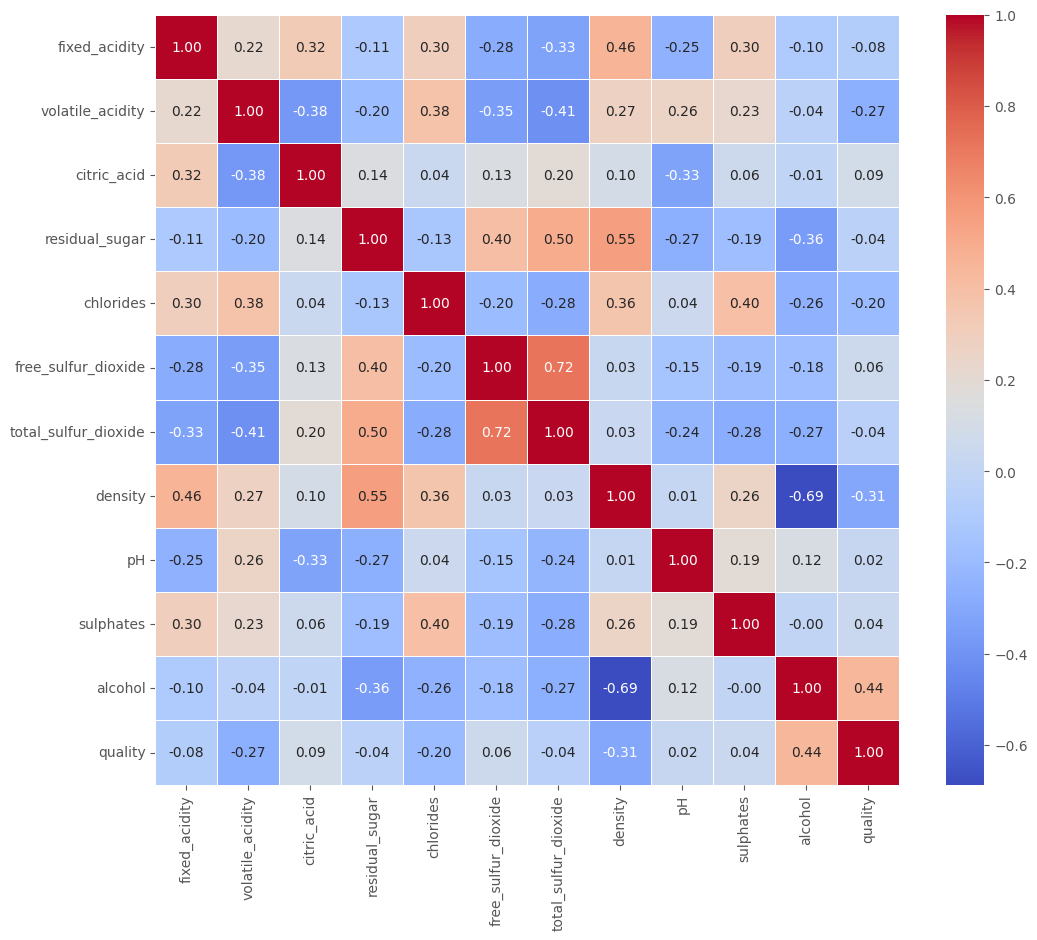

In [16]:
corr_matrix = combined.corr()
print(corr_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)


Calculating the correlation matrix of the new dataset which does not have the <b>total_sulfur_dioxide</b> column and displaying it as a heatmap

<Axes: >

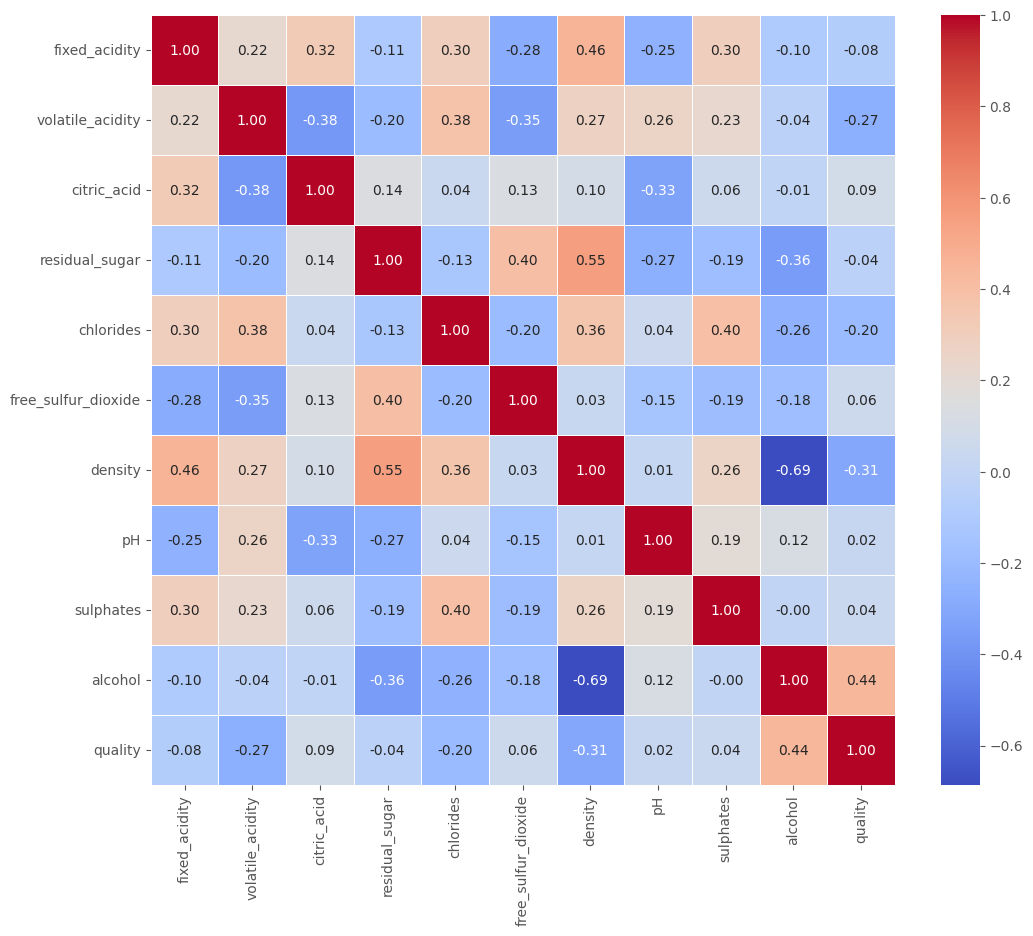

In [17]:
combined_1 = pd.concat([wq_X_1, wq_y], axis = 1)
corr_matrix_1 = combined_1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_1, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

Calculating the correlation matrix of the third dataset which does not have the <b>density</b> column and displaying it as a heatmap

<Axes: >

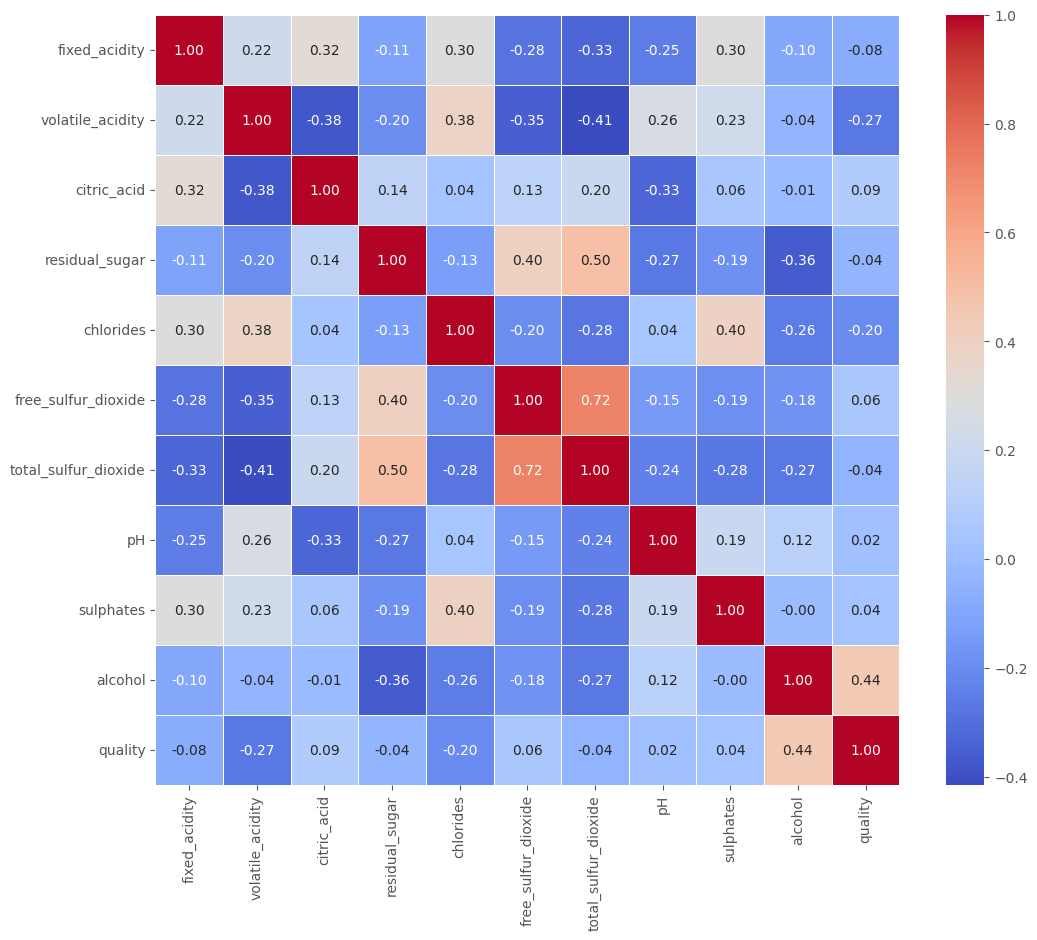

In [18]:
combined_2 = pd.concat([wq_X_2, wq_y], axis = 1)
corr_matrix_2 = combined_2.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_2, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)

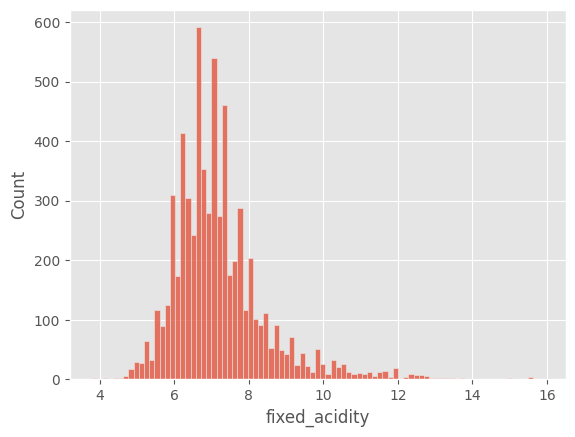

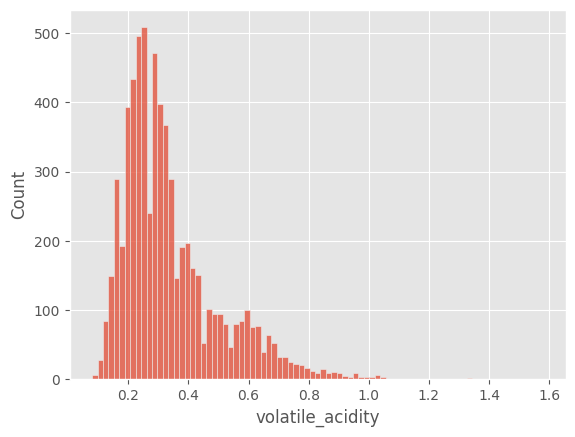

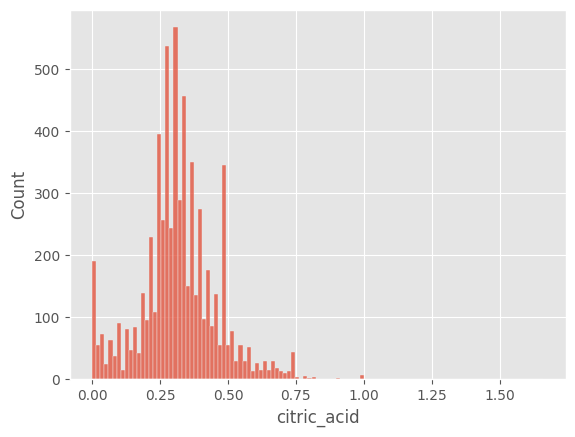

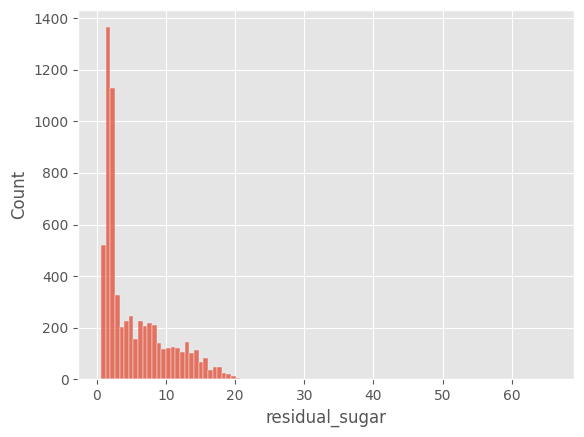

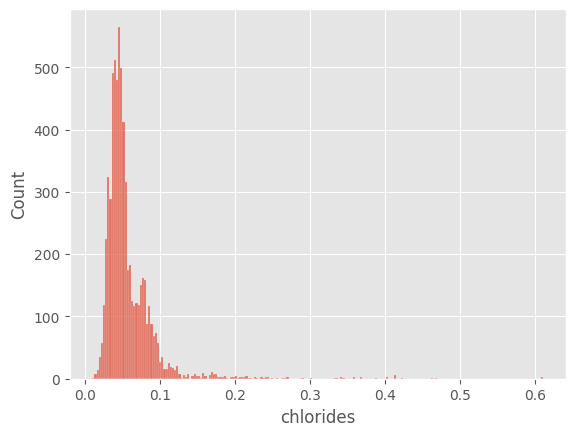

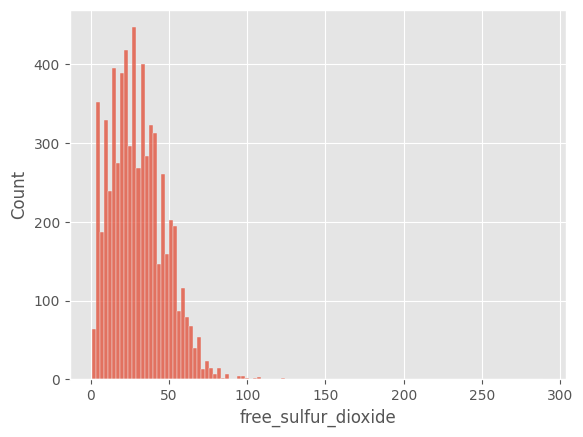

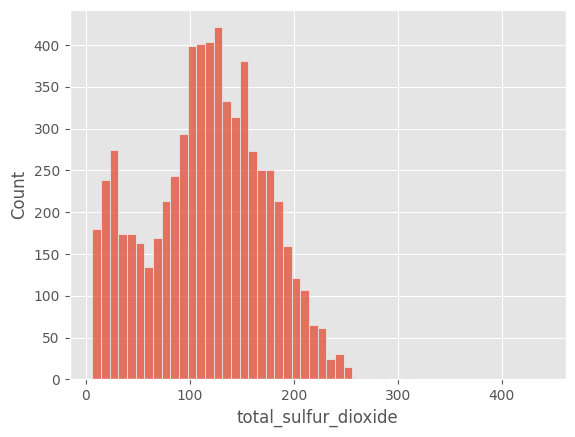

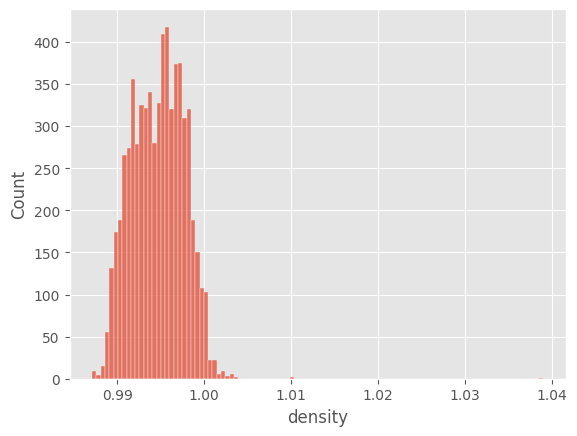

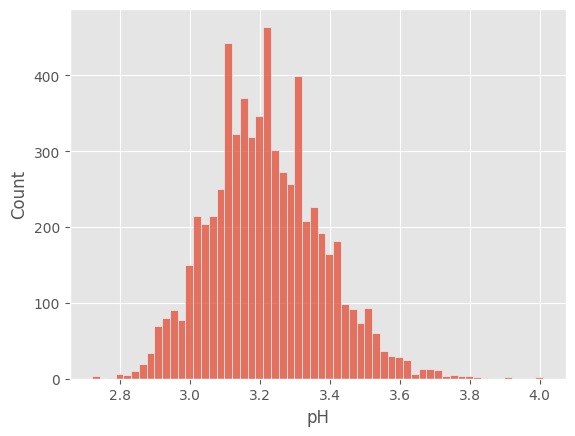

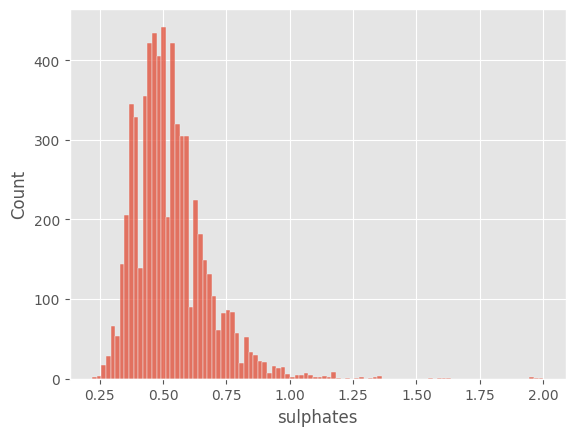

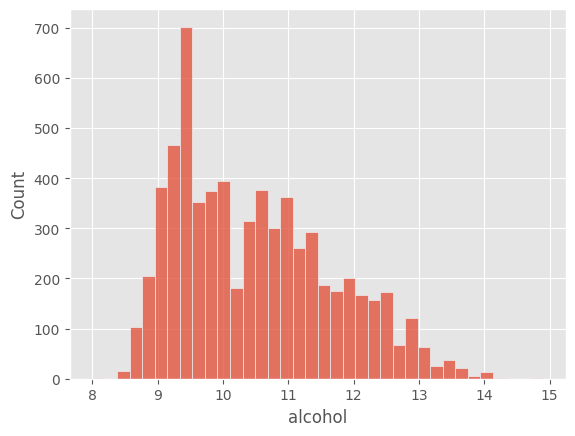

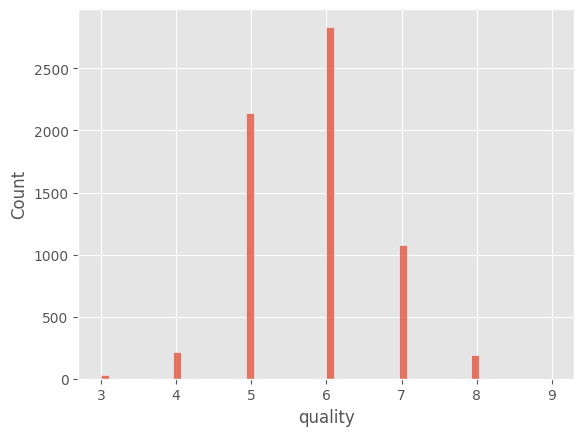

In [19]:
for column in combined.columns:
    plt.figure()
    sns.histplot(combined[column])  


In [20]:
X = combined.drop(columns = ["quality"])
y = combined["quality"]

In [21]:
X_1 = combined_1.drop(columns = ["quality"])
y_1 = combined_1["quality"]

In [22]:
X_2 = combined_2.drop(columns = ["quality"])
y_2 = combined_2["quality"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

In [25]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)

In [26]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)


Creating two random forest models for the three datasets - the original dataset, the second one with the high variance column removed, and the third one with the high entropy feature removed

In [27]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [29]:
rf_model_3 = RandomForestClassifier()
rf_model_3.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [30]:
y_pred = rf_model_1.predict(X_test)

In [31]:
y_pred_1 = rf_model_2.predict(X_test_1)

In [32]:
y_pred_2 = rf_model_3.predict(X_test_2)

Printing the classification report of the first random forest model

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.14      0.24        43
           5       0.67      0.74      0.70       402
           6       0.68      0.75      0.71       597
           7       0.75      0.58      0.65       215
           8       0.81      0.36      0.50        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.52      0.37      0.40      1300
weighted avg       0.69      0.68      0.67      1300



c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Printing the classification report of the second random forest model

In [34]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.78      0.16      0.27        43
           5       0.67      0.73      0.70       402
           6       0.67      0.76      0.71       597
           7       0.71      0.54      0.61       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.54      0.36      0.40      1300
weighted avg       0.68      0.68      0.67      1300



c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Creating the classification report of the third random forest model

In [35]:
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.14      0.24        43
           5       0.66      0.73      0.70       402
           6       0.66      0.74      0.70       597
           7       0.70      0.54      0.61       215
           8       0.87      0.36      0.51        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.36      0.39      1300
weighted avg       0.67      0.67      0.66      1300



c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\Desktop\Hrishikesh MJ MSC CS(AI)\AI sem II\mvprlab\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [36]:
print("The accuracy of the first model is ", accuracy_score(y_test, y_pred))
print("The accuracy of the second model is ", accuracy_score(y_test_1, y_pred_1))
print("The accuracy of the third model is ", accuracy_score(y_test_2, y_pred_2))

The accuracy of the first model is  0.6838461538461539
The accuracy of the second model is  0.676923076923077
The accuracy of the third model is  0.6692307692307692
